In [1]:
import os
import random
import numpy as np
import pandas as pd

import albumentations as A
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data_list = pd.read_csv('/data/komedi/dataset/versioning/22-07-15-1340-train.csv',header=None).values.tolist()
print(len(data_list))

2584


In [12]:
aug_list = {"normal":None,
            "horizontal":A.HorizontalFlip(always_apply=True),
            "gaussnoise":A.GaussNoise(always_apply=True),
            "clahe":A.CLAHE(always_apply=True),
            "imagecomp":A.ImageCompression(always_apply=True),
            "randomgamma":A.RandomGamma(always_apply=True),
            "posterize":A.Posterize(always_apply=True),
            "shiftscalerotate":A.ShiftScaleRotate(border_mode=1, always_apply=True),
            "randomscale":A.RandomScale(scale_limit=(-0.5,0.5), always_apply=True),
            "blur":A.Blur(always_apply=True)}

for dir in aug_list.keys():
    os.makedirs(f"/data/komedi/dataset/train/{dir}",exist_ok=True)

In [13]:
def augmentation(aug_list, data):
    csv_list = []
    
    image_name = data[0]
    
    margin = 200
    crop_area = (data[4]-margin//2,
                 data[5]-margin//2,
                 data[6]+margin//2,
                 data[7]+margin//2)
        
    pil_image = Image.open(data[3])
    crp_image = pil_image.crop(crop_area)
    npy_image = np.array(crp_image)

    label = []
    for landmark in data[8:]:
        x,y = eval(landmark[1:-1])
        label.append([x,y])
    lst_label = np.array(label)
    
    for types in aug_list.keys():
        if types:
            transform = A.Compose([
                aug_list[types]],
                keypoint_params = A.KeypointParams(format="xy",remove_invisible = False))
    
            transformed = transform(image=npy_image, keypoints=lst_label)
            aug_image = transformed['image']
            aug_label = transformed['keypoints']

            out_image = aug_image
            out_label = aug_label
        else:
            out_image = npy_image
            out_label = lst_label
        image = Image.fromarray(out_image)
        image.save(f"/data/komedi/dataset/train/{types}/{image_name}")
    
    csv_list.append(image_name)
    csv_list.append(f"/data/komedi/dataset/train/{types}/{image_name}")
    for label in out_label:
        csv_list.append(label)
    return csv_list
        

In [24]:
from tqdm import tqdm
csv_lists = []
for idx, data in enumerate(tqdm(data_list)):
    # if idx>=10:
    #     break
    image_name = data[0]

    margin = 200
    crop_area = (data[4]-margin//2,
                    data[5]-margin//2,
                    data[6]+margin//2,
                    data[7]+margin//2)
    
    pil_image = Image.open(data[3])
    crp_image = pil_image.crop(crop_area)
    npy_image = np.array(crp_image)

    label = []
    for landmark in data[8:]:
        x,y = eval(landmark[1:-1])
        label.append([x,y])
    lst_label = np.array(label)

    for types in aug_list.keys():
        csv_list = []
        if not aug_list[types]:
            transform = A.Compose([
                A.Resize(224,224)],
                keypoint_params = A.KeypointParams(format="xy",remove_invisible = False))
            
            transformed = transform(image=npy_image, keypoints=lst_label)
            aug_image = transformed['image']
            aug_label = transformed['keypoints']
                    
            out_image = aug_image
            out_label = aug_label    
        else:
            transform = A.Compose([
                A.Resize(224,224),
                aug_list[types]],
                keypoint_params = A.KeypointParams(format="xy",remove_invisible = False))

            transformed = transform(image=npy_image, keypoints=lst_label)
            aug_image = transformed['image']
            aug_label = transformed['keypoints']

            out_image = aug_image
            out_label = aug_label
            
        image = Image.fromarray(out_image)
        image.save(f"/data/komedi/dataset/train/{types}/{image_name}")

        csv_list.append(image_name)
        csv_list.append(f"/data/komedi/dataset/train/{types}/{image_name}")
        for label in out_label:
            x,y = label
            csv_list.append((x,y))
        csv_lists.append(csv_list)
        
    random.shuffle(csv_lists)
    df = pd.DataFrame(csv_lists)
    df.to_csv("/data/komedi/dataset/versioning/22-07-15-1400-Aug10.csv",header=None, index=None)
print(len(csv_lists))

 13%|█▎        | 345/2584 [01:36<16:32,  2.26it/s]

In [20]:
csv_lists[1]

['image_0115.jpg',
 '/data/komedi/dataset/train/normal/image_0115.jpg',
 (77.22105263157894, 124.96842105263157),
 (94.90526315789472, 158.56842105263158),
 (125.55789473684209, 174.48421052631576),
 (160.92631578947368, 147.36842105263156),
 (169.76842105263157, 108.46315789473684),
 (114.3578947368421, 88.42105263157895),
 (114.94736842105262, 94.90526315789472),
 (116.12631578947368, 109.05263157894736),
 (118.48421052631578, 120.25263157894736),
 (85.4736842105263, 95.49473684210525),
 (103.1578947368421, 92.54736842105262),
 (129.09473684210525, 89.6),
 (146.77894736842103, 86.06315789473683),
 (103.74736842105263, 137.93684210526314),
 (119.66315789473683, 130.86315789473684),
 (141.4736842105263, 133.81052631578947),
 (120.84210526315789, 145.6),
 (120.25263157894736, 134.9894736842105),
 (113.17894736842103, 78.39999999999999),
 (119.07368421052631, 125.55789473684209),
 (111.41052631578947, 44.8),
 (106.10526315789473, 117.89473684210525),
 (132.04210526315788, 114.35789473684

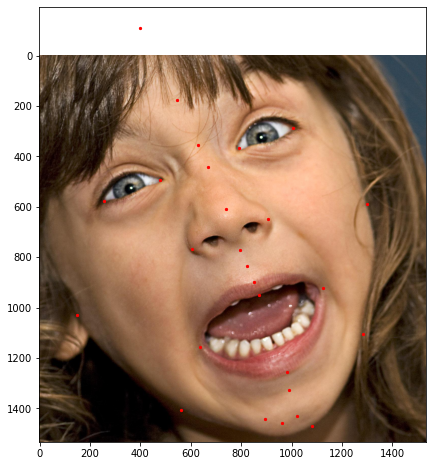

In [65]:
random.shuffle(data_list)
"""
0: name
1 ~ 2: type(kface, ibug, aflw2000)
3: image path
4 ~ 7: bbox value(lx, ly, rx, ry)
8 ~ 35: facial landmark 
"""

idx = 0
data = data_list[idx]
image = Image.open(data[3]).crop((data[4]-100,data[5]-100,data[6]+100,data[7]+100))
image = np.array(image)
# plt.figure(figsize=(8,8))
# plt.imshow(image)
label = []
for landmark in data[8:]:
    x,y = eval(landmark[1:-1])
    # plt.scatter(x,y,s=5,c='r')
    label.append([x,y])
label = np.array(label)

In [69]:
transform_list = []
transform = A.Compose([
    A.HorizontalFlip(always_apply=True)
],keypoint_params = A.KeypointParams(format="xy",remove_invisible = False))

In [70]:
transformed = transform(image=image, keypoints=label)
aug_image = transformed['image']
aug_label = transformed['keypoints']

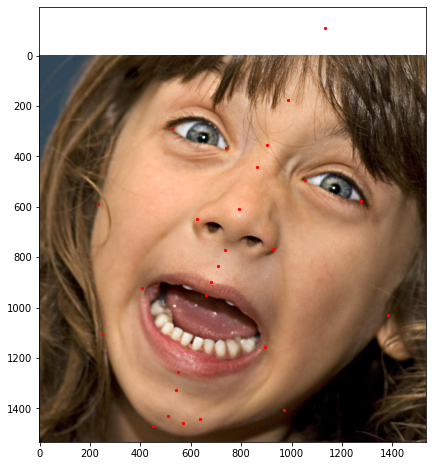

In [71]:
pil_image = Image.fromarray(aug_image)

plt.figure(figsize=(8,8))
plt.imshow(pil_image)
for landmark in aug_label:
    x,y = landmark
    plt.scatter(x,y,s=5,c='r')